In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris = pd.read_csv(url)

print(iris.shape)

(150, 5)


In [19]:
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [20]:
XY = np.array(iris)
print(XY[:10])

[[5.1 3.5 1.4 0.2 'Setosa']
 [4.9 3.0 1.4 0.2 'Setosa']
 [4.7 3.2 1.3 0.2 'Setosa']
 [4.6 3.1 1.5 0.2 'Setosa']
 [5.0 3.6 1.4 0.2 'Setosa']
 [5.4 3.9 1.7 0.4 'Setosa']
 [4.6 3.4 1.4 0.3 'Setosa']
 [5.0 3.4 1.5 0.2 'Setosa']
 [4.4 2.9 1.4 0.2 'Setosa']
 [4.9 3.1 1.5 0.1 'Setosa']]


처음 2개의 컬럼(sepal.length, sepal.width)을 X 데이터로 설정합니다

비지도 학습이므로 정답인 칼럼인 variety는 학습에 이용하지 않습니다.

In [21]:
X = XY[:, 0:2]  #세로가 0, 1인거 모두

In [22]:
print(X[:10])

[[5.1 3.5]
 [4.9 3.0]
 [4.7 3.2]
 [4.6 3.1]
 [5.0 3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.0 3.4]
 [4.4 2.9]
 [4.9 3.1]]


우리는 꽃이 3개의 종류인 것을 알고 있으므로 k = 3으로 시작. 즉 3개의 그룹으로 Clustering 하는 작업을 진행합니다.

In [23]:
#3개의 랜덤 좌표를 뽑는 과정

k = 3
C_x = np.random.choice(X[:,0], k)  #X의 2개의 값 중 처음 값 3개, 즉 3개의 x좌표값을 랜덤으로 선정
C_y = np.random.choice(X[:,1], k)  #X의 2개의 값 중 두번째 값 3개, 즉 3개의 y좌표값을 랜덤으로 선정 
print('Cx', C_x)
print('Cy', C_y)
C = np.array(list(zip(C_x, C_y)))   # zip으로 x좌표값, y좌표값을 묶어서 3X2의 배열로 만듬. 중앙좌표값(Center) 
print(C)

Cx [7.7 4.4 6.3]
Cy [2.8 2.3 2.9]
[[7.7 2.8]
 [4.4 2.3]
 [6.3 2.9]]


In [24]:
SepalLength = iris['sepal.length']
SepalWidth = iris['sepal.width']
plt.title('SepalLength & SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.scatter(SepalLength, SepalWidth, marker = '^', c='blue', s=10, label='Sepal') # s : size
plt.scatter(C_x, C_y, marker = '*', c='black', s=200, label='centroids')  #3개 출력
plt.legend(loc='best') 
plt.grid()
plt.show()

TypeError: 'str' object is not callable

In [ ]:
def Distance(A, B) :
  return np.sqrt(np.sum(np.power((A-B), 2)))   # 루트[(x2-x1)제곱 + (y2-y1)제곱]

C_old = np.zeros(C.shape)    # 이전 Center 좌표
print(C_old)
clusters = np.zeros(len(X))  # X 항목의 갯수만큼 1차원 배열
flag = Distance(C, C_old)    # C의 3개점과 (0,0)의 거리의 합
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
11.571084650973738


Shallow Copy vs. Deep Copy

Shallow Copy는 원본이 바뀌면 복사객체도 같이 값이 바뀌게 됩니다.

Deep Copy는 원본이 바뀌어도 복사객체는 값의 변화가 없습니다.

In [ ]:
#shallow copy는 origin이 바뀌면 복사객체도 값이 바뀐다
import copy
a = [[1,2],[3,4]]
b = copy.copy(a)
a[1].append(5)
print('a 배열 :', id(a), a)
print('b 배열 :', id(b), b)

#deep copy는 origin이 바뀌어도 복사객체는 값의 변화가 없다
a = [[1,2],[3,4]]
b = copy.deepcopy(a)
a[1].append(5)
print('a 배열 :', id(a), a)
print('b 배열 :', id(b), b)

a 배열 : 3122535989184 [[1, 2], [3, 4, 5]]
b 배열 : 3122535980032 [[1, 2], [3, 4, 5]]
a 배열 : 3122535206208 [[1, 2], [3, 4, 5]]
b 배열 : 3122526428544 [[1, 2], [3, 4]]


In [ ]:
from copy import deepcopy

distances = []

while flag != 0 :
  for i in range(len(X)) :    # 모든 점에 대해서 C의 3점 중 가장 가까운 점을 찾아서 cluter에 저장
    for j in range(3) :       # X의 한 점과 C의 3점 각각에 대해서 거리를 구해서 distance에 저장
      temp = Distance(X[i], C[j])
      distances.append(temp)

    cluster = np.argmin(distances)  # 최소값의 index값(0, 1, 2)
    clusters[i] = cluster           # C의 3점 중 가장 가까운 점 주소값을 입력
    distances = []                  # distances 초기화

  C_old = deepcopy(C)               #C 배열 복사

  #다시 중점을 선정하는 과정
  for i in range(k) :
    points = [X[j] for j in range(len(X)) if clusters[j] == i] # k값 0,1,2 각각에 해당하는 X(x,y) 좌표를 다 points라는 리스트에 입력

    tot_x = tot_y = 0
    for po in points :
      tot_x += po[0]
      tot_y += po[1]

    C[i] = [tot_x/len(points), tot_y/len(points)]   # 새로운 중심점 설정

  print(C)
  flag = Distance(C, C_old)
  #print(flag)

[[5.30163934 2.82786885]
 [5.25172414 3.66896552]
 [6.68       2.995     ]]
[[5.31923077 2.76923077]
 [5.14705882 3.61764706]
 [6.6390625  2.99375   ]]
[[5.38297872 2.72553191]
 [5.09230769 3.56153846]
 [6.6390625  2.99375   ]]
[[5.5425     2.67      ]
 [5.01914894 3.47021277]
 [6.64920635 2.9952381 ]]
[[5.63488372 2.65581395]
 [5.01632653 3.45102041]
 [6.69655172 3.02241379]]
[[5.6787234  2.66808511]
 [5.01632653 3.45102041]
 [6.73703704 3.03888889]]
[[5.71960784 2.67843137]
 [5.01632653 3.45102041]
 [6.78       3.058     ]]
[[5.76346154 2.69038462]
 [5.006      3.428     ]
 [6.80208333 3.06875   ]]
[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]
[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


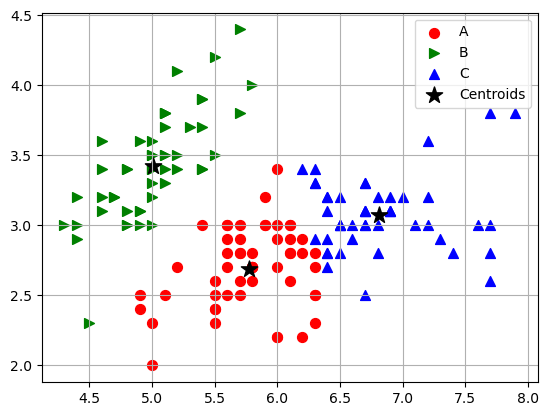

In [ ]:
plt.title = ('SepalLength & SepalWidth')
plt.xlabel = ('SepalLength')
plt.ylabel = ('SepalWidth')

# X는 2차원 배열. clusters가 0인 index값이 x좌표, 0이 y좌표. cluster가 0인 index 값이 x좌표, 1이 y좌표
plt.scatter(X[clusters==0,0], X[clusters==0,1], s=50, c='red', marker='o', label='A')  
plt.scatter(X[clusters==1,0], X[clusters==1,1], s=50, c='green', marker='>', label='B') #clusters가 1인 X의 x좌표, y좌표
plt.scatter(X[clusters==2,0], X[clusters==2,1], s=50, c='blue', marker='^', label='C')  #clusters가 2인 X의 x좌표, y좌표
plt.scatter(C[:,0], C[:,1], s=150, c='black', marker='*', label='Centroids') #C의 0세로줄 1세로줄
plt.legend()
plt.grid()
plt.show()

c:\Users\gadi2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Centroids: [[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


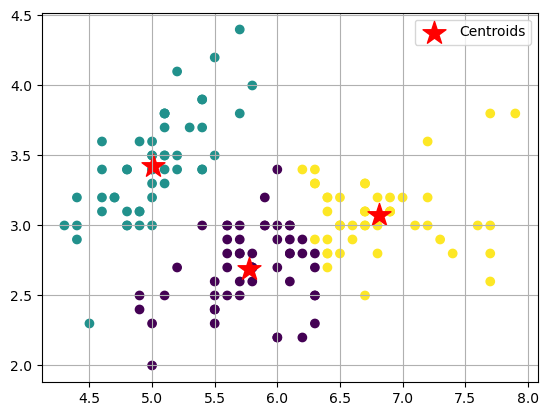

In [28]:
from sklearn.cluster import KMeans 

k = 3
kmeans = KMeans(n_clusters=k, init='random', random_state=0)  # KMeans 객체 생성
kmeans.fit(X)  # KMeans 모델 훈련

C = kmeans.cluster_centers_  # 중심점(C) 추출
print("Centroids:", C)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis')  # kmeans.labels_에 각 그룹의 값이 저장됨
plt.scatter(C[:,0], C[:,1], marker='*', s=300, c='red', label='Centroids')  # 중심점을 표시

plt.legend()
plt.grid()
plt.show()